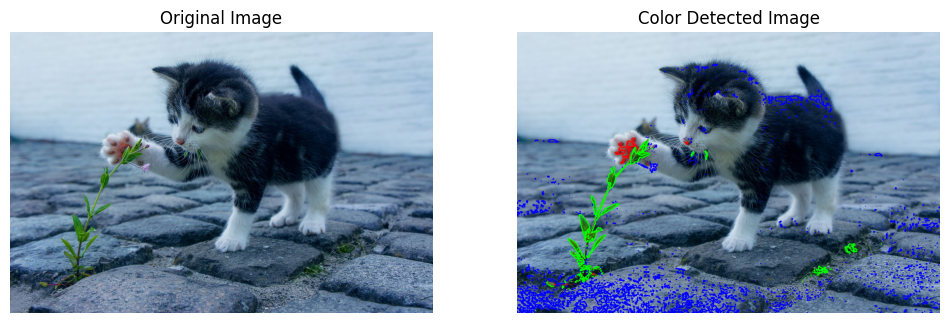

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

def color_detection(image):
    # Convert image to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define color ranges
    lower_red = np.array([0, 50, 50])
    upper_red = np.array([10, 255, 255])
    lower_blue = np.array([110, 50, 50])
    upper_blue = np.array([130, 255, 255])
    lower_green = np.array([50, 50, 50])
    upper_green = np.array([70, 255, 255])

    # Create masks for each color
    mask_red = cv2.inRange(hsv_image, lower_red, upper_red)
    mask_blue = cv2.inRange(hsv_image, lower_blue, upper_blue)
    mask_green = cv2.inRange(hsv_image, lower_green, upper_green)

    # Find contours in the masks
    contours_red, _ = cv2.findContours(mask_red, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours_blue, _ = cv2.findContours(mask_blue, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours_green, _ = cv2.findContours(mask_green, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on the image
    color_detected_image = image.copy()
    cv2.drawContours(color_detected_image, contours_red, -1, (0, 0, 255), 2)
    cv2.drawContours(color_detected_image, contours_blue, -1, (255, 0, 0), 2)
    cv2.drawContours(color_detected_image, contours_green, -1, (0, 255, 0), 2)

    # Display the original and color-detected images side by side
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[0].set_title("Original Image")
    axes[0].axis('off')

    axes[1].imshow(cv2.cvtColor(color_detected_image, cv2.COLOR_BGR2RGB))
    axes[1].set_title("Color Detected Image")
    axes[1].axis('off')

    plt.show()

# Load image
image_path = '/content/img.jpg'
image = cv2.imread(image_path)

# Perform color detection
color_detection(image)
